<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-1-mg-basics/3-smooth-error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
#plt.style.use('seaborn-talk')
%matplotlib inline

Let's create a matrix
$$
A = 
\left[
\begin{array}{r r r r r}
2 & -1 &  & & \\
-1 & 2 & -1 & & \\
   & -1 & 2 & -1 & \\
& & \ddots & & \\
& & & -1 & 2
\end{array}
\right]
$$

and the necessary operators for weighted Jacobi

In [2]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

Next, instead of solving
$$
A u = 0
$$
we will solve
$$
A u = b
$$
with $u^*$ selected at random and $b$ constructed from the product.

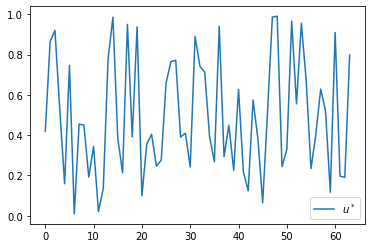

In [3]:
np.random.seed(65883)
ustar = np.random.rand(n)
b = A * ustar

plt.plot(ustar, label=r'$u^*$')
plt.legend()

next, let's relax on
$$
Au = b
$$
and look at the **solution**

In [4]:
omega = 2.0/3.0
rnorm = []
monitor = True
u = np.random.rand(n)
for i in range(200):
    u[:] = u + omega * Dinv * (b - A * u)
    #u[:] = u - sla.spsolve(D-E, A*u)
    rnorm.append(np.linalg.norm(b - A * u))

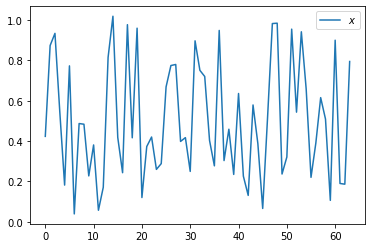

In [5]:
plt.plot(u, label=r'$x$')
plt.legend()

Now look at the **ERROR**

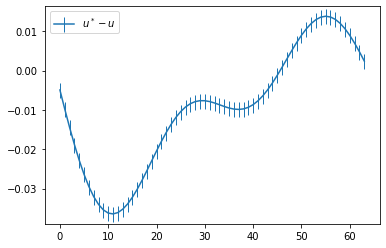

In [6]:
plt.plot(ustar - u, marker='|', markersize=15, label=r'$u^* - u$')
plt.legend()

To look ahead, take a look at the **error** on every other point...

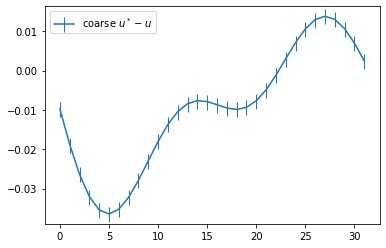

In [7]:
e = ustar - u
plt.plot(e[1::2], marker='|', markersize=15, label=r'coarse $u^* - u$')
plt.legend()